# LSTM
It is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the 
model has a combination of four layers interacting with each other.

### Importing all the required dependencies

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Dataset

In [6]:
google_stock_data = pd.read_csv('GOOG.csv')
google_stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [7]:
# Extracting required columns
google_stock_data = google_stock_data[['date','open','close']] 

# Selecting only date
google_stock_data['date'] = pd.to_datetime(google_stock_data['date'].apply(lambda x: x.split()[0])) 

# Setting date column as index
google_stock_data.set_index('date',drop=True,inplace=True) 
google_stock_data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


### Plot the Open and Close Price

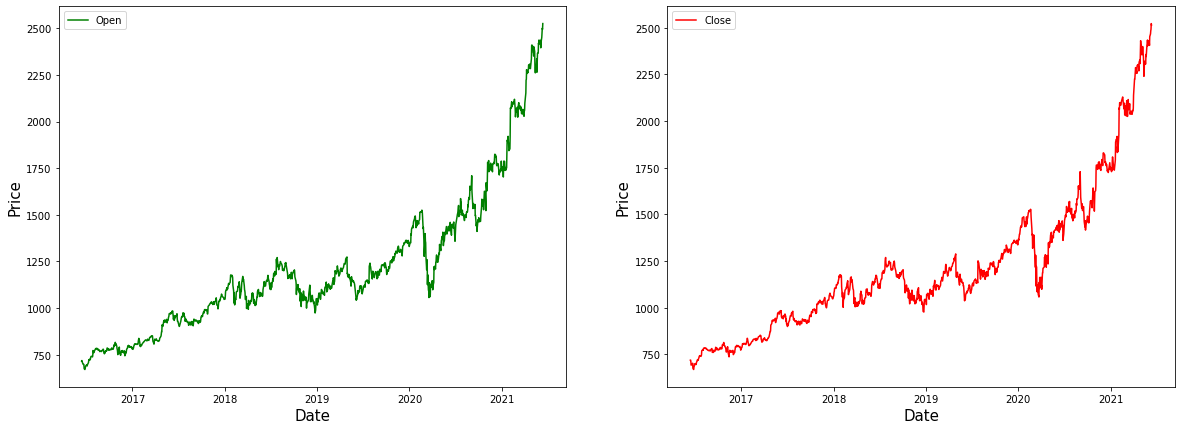

In [8]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(google_stock_data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(google_stock_data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

## Data Pre-Processing
Data Preprocessing is that step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it.

In other words, the features of the data can now be easily interpreted by the algorithm.

In [9]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
google_stock_data[google_stock_data.columns] = MMS.fit_transform(google_stock_data)

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

#### Why to normalize prior to model fitting?

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [10]:
google_stock_data.shape

(1258, 2)

#### Seperating data into train and test data

In [11]:
training_size = round(len(google_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [12]:
train_data = google_stock_data[:training_size]
test_data  = google_stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [15]:


# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [16]:


train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)



In [17]:


train_seq.shape, train_label.shape, test_seq.shape, test_label.shape



((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

## Creating LSTM model

In [18]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional



In [19]:


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 8s 77ms/step - loss: 0.0069 - mean_absolute_error: 0.0597 - val_loss: 0.0164 - val_mean_absolute_error: 0.1069
Epoch 2/80
30/30 [==============================] - 1s 44ms/step - loss: 9.6073e-04 - mean_absolute_error: 0.0242 - val_loss: 0.0119 - val_mean_absolute_error: 0.0927
Epoch 3/80
30/30 [==============================] - 1s 44ms/step - loss: 6.4066e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0068 - val_mean_absolute_error: 0.0674
Epoch 4/80
30/30 [==============================] - 1s 45ms/step - loss: 5.8248e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0062 - val_mean_absolute_error: 0.0642
Epoch 5/80
30/30 [==============================] - 1s 45ms/step - loss: 5.7408e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0088 - val_mean_absolute_error: 0.0793
Epoch 6/80
30/30 [==============================] - 1s 47ms/step - loss: 5.6142e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0070 - val_mean_absolute_error: 0.0697
Ep

Epoch 50/80
30/30 [==============================] - 1s 45ms/step - loss: 2.1231e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0045 - val_mean_absolute_error: 0.0501
Epoch 51/80
30/30 [==============================] - 1s 44ms/step - loss: 2.0033e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0064 - val_mean_absolute_error: 0.0661
Epoch 52/80
30/30 [==============================] - 1s 43ms/step - loss: 1.9434e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0036 - val_mean_absolute_error: 0.0453
Epoch 53/80
30/30 [==============================] - 1s 43ms/step - loss: 1.7304e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0027 - val_mean_absolute_error: 0.0372
Epoch 54/80
30/30 [==============================] - 1s 43ms/step - loss: 1.8143e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0019 - val_mean_absolute_error: 0.0305
Epoch 55/80
30/30 [==============================] - 1s 43ms/step - loss: 1.8384e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0036 - val_mean_absolute_error:

In [21]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.48245102, 0.48658797],
       [0.4870406 , 0.49113497],
       [0.49274313, 0.49677965],
       [0.5100712 , 0.51378274],
       [0.518964  , 0.52205026]], dtype=float32)

In [22]:


test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]



array([[1565.4257, 1570.073 ],
       [1573.9343, 1578.5001],
       [1584.5063, 1588.9615],
       [1616.6312, 1620.4741],
       [1633.1177, 1635.7966]], dtype=float32)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test_label, test_inverse_predicted))

1875.4600633648383

## Visualizing predicted and actual data


In [23]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([google_stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=google_stock_data.iloc[-202:].index)], axis=1)

In [24]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [25]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1565.425659,1570.072998
2020-08-25,1582.07,1608.22,1573.934326,1578.500122
2020-08-26,1608.00,1652.38,1584.506348,1588.961548
2020-08-27,1653.68,1634.33,1616.631226,1620.474121
2020-08-28,1633.49,1644.41,1633.117676,1635.796631


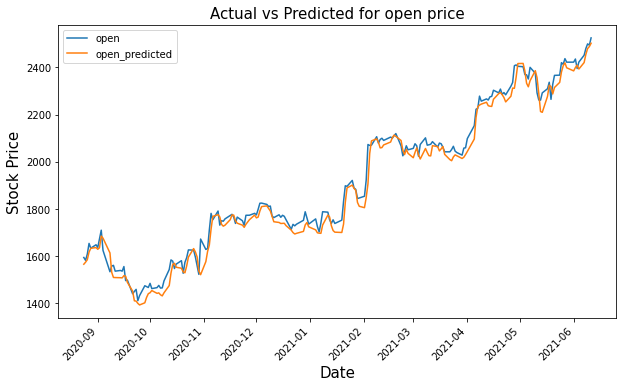

In [26]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

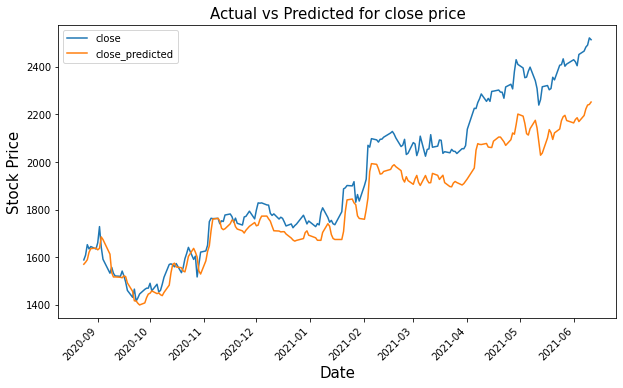

In [27]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [28]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [30]:
gs_slic_data['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2479.764404,2239.325195
2021-06-10,2494.01,2521.60,2487.960449,2241.805420
2021-06-11,2524.92,2513.93,2502.195312,2251.971191
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [31]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [32]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

In [33]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

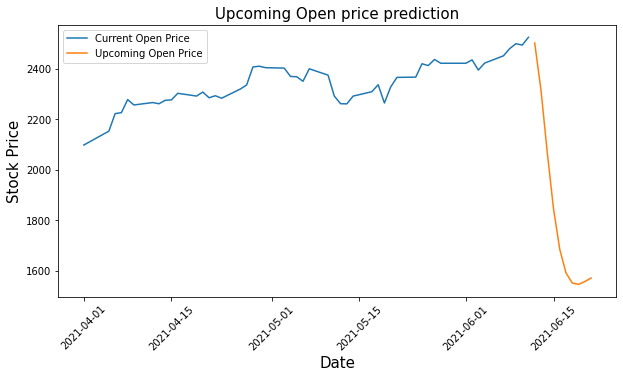

In [34]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

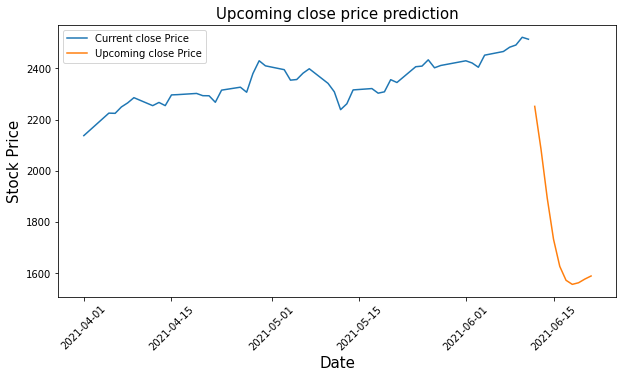

In [35]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()